# Определение перспективного тарифа для телеком-компании

**Цель:** Нужно проанализировать поведение клиентов за 2018 год и сделать вывод — какой тариф ("Смарт" или "Ультра") лучше.

**Задачи:**

* Изучить общую информацию;

* Подготовить данные

    Привести данные к нужным типам;
    Найти и исправить ошибки в данных, если они есть.
   
* Посчитать для каждого пользователя:

    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя.

* Проанализировать данные
    Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

* Проверить гипотезы
    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Работа с calls 

In [2]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Даты звонков представлены в формате объекта, необходимо их перевести в формат даты, чтобы можно было сделать отдельный столбец по месяцам.

Аналогично поступаем со всеми датафреймами, где есть даты.

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

Выделим из общей даты столбец с месяцем для удобства дальнейших подсчетов.

In [5]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,0.00,1000,11
6,1000_6,2018-10-18,0.00,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,0.00,1000,8


Создадим отдельный датафрейм с id абонентов и месяцами, он нам понадобится в дальнейшем для соединения с users.

In [6]:
calls_month = calls[['user_id', 'month']]

In [7]:
calls.duplicated().sum()

0

Дубликаты не обнаружены, пропущенных знаычений также не наблюдается (судя по рузультатам info()).

### Работа с internet

Здесь всё аналогично работе с предыдущим датафреймом.

In [8]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

In [11]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [12]:
internet['gb_used'] = internet['mb_used'] / 1024
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112.95,2018-11-25,1000,11,0.110303
1,1,1000_1,1052.81,2018-09-07,1000,9,1.028135
2,2,1000_2,1197.26,2018-06-25,1000,6,1.169199
3,3,1000_3,550.27,2018-08-22,1000,8,0.537373
4,4,1000_4,302.56,2018-09-24,1000,9,0.295469
5,5,1000_5,399.97,2018-10-02,1000,10,0.390596
6,6,1000_6,540.08,2018-09-07,1000,9,0.527422
7,7,1000_7,415.70,2018-07-11,1000,7,0.405957
8,8,1000_8,505.40,2018-10-08,1000,10,0.493555
9,9,1000_9,345.54,2018-09-03,1000,9,0.337441


Нули в  таблицах со зваонками и интернет-трафиком скорее всего связаны с тем, что это или пропущенные звонки, или сброшенные(в случае с таблицей звонков), а для интернет-трафика - отсутствие выхода в интернет.

На мой взгляд, эти данные нам не помешают, т.к. тоже являются показателями, которые отражают то, как пользователи пользуются услугами по тому или иному тарифу.

In [13]:
internet.duplicated().sum()

0

### Работа с messages

In [14]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

In [17]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [18]:
messages.duplicated().sum()

0

### Работа с tarrifs

In [19]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для того чтобы в дальнейшем удобно было подсчитывать значения по тарифам, приведем наименование столбца с тарифами к общему значению с аналогичными столбцами в других датафреймах.

In [20]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff',
    }
)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Работа с users

In [21]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [23]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

В данном датафрейме много значений, которые нам не понадобятся для дальнейших исследований. Создадим на его основе датафрейм, куда поместим необходимые нам значения.

In [24]:
users_df = users[['user_id', 'tariff']]
users_df

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
...,...,...
495,1495,ultra
496,1496,smart
497,1497,smart
498,1498,smart


Присоединив ранее созданный датафрейм с месяцами, мы добавляем их к users.

users_df = users_df.merge(calls_month, on='user_id')
users_df

In [25]:
users.duplicated().sum()

0

## Подготовка данных

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Поскольку после сглаживания мультииндексов мы получим одинаковые наименования двух столбцов с количеством звонков и их продолжительностью, продублируем столбец duration под другим именем.

Помимо этого, необходимо округлить время звонков:

In [26]:
import math
def upgrade(duration):
    duration = math.ceil(duration)
    return duration

calls['minutes'] = calls['duration'].apply(upgrade)
calls = calls.drop(['duration'], axis=1)
calls.head(10)

,id,call_date,user_id,month,minutes
0,1000_0,2018-07-25,1000,7,0
1,1000_1,2018-08-17,1000,8,0
2,1000_2,2018-06-11,1000,6,3
3,1000_3,2018-09-21,1000,9,14
4,1000_4,2018-12-15,1000,12,6
5,1000_5,2018-11-02,1000,11,0
6,1000_6,2018-10-18,1000,10,0
7,1000_7,2018-08-22,1000,8,19
8,1000_8,2018-09-15,1000,9,19
9,1000_9,2018-08-15,1000,8,0


In [27]:
calls['calls_count'] = calls['minutes']

На этой основе создадим сводные таблицы для обоих значений.

In [28]:
calls_pt_sum = calls.pivot_table(index=['user_id', 'month'], values=['minutes'], aggfunc=['sum'])
calls_pt_count = calls.pivot_table(index=['user_id', 'month'], values=['calls_count'], aggfunc=['count'])                                                                                         
calls_pt_sum.head(10)

sum
              minutes
user_id month        
1000    5         159
        6         172
        7         340
        8         408
        9         466
        10        350
        11        338
        12        333
1001    11        430
        12        414

In [29]:
# axis = 1 - сброс мультииндекса в столбцах, axis = 0 - сброс в строках.
# level = 0 - сброс верхнего, level = 1 - сброс следующего и т.д.

calls.pivot_table(index=['user_id', 'month'], values=['minutes'], aggfunc=['sum', 'count']).droplevel(level=1, axis=1)

sum  count
user_id month            
1000    5      159     22
        6      172     43
        7      340     47
        8      408     52
        9      466     58
...            ...    ...
1498    10     247     41
1499    9       70      9
        10     449     68
        11     612     74
        12     492     69

[3174 rows x 2 columns]

In [30]:
calls.groupby(['user_id', 'month'])['minutes'].agg(['sum', 'count'])

sum  count
user_id month            
1000    5      159     22
        6      172     43
        7      340     47
        8      408     52
        9      466     58
...            ...    ...
1498    10     247     41
1499    9       70      9
        10     449     68
        11     612     74
        12     492     69

[3174 rows x 2 columns]

In [31]:
calls.pivot_table(index=['user_id', 'month'], values=['minutes'], aggfunc=['sum', 'count'])

sum   count
              minutes minutes
user_id month                
1000    5         159      22
        6         172      43
        7         340      47
        8         408      52
        9         466      58
...               ...     ...
1498    10        247      41
1499    9          70       9
        10        449      68
        11        612      74
        12        492      69

[3174 rows x 2 columns]

In [32]:
calls_pt_count.head(10)

count
              calls_count
user_id month            
1000    5              22
        6              43
        7              47
        8              52
        9              58
        10             57
        11             43
        12             46
1001    11             59
        12             63

### Количество отправленных сообщений по месяцам

In [33]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values=['id'], aggfunc=['count'])
messages_pivot.head(10)

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57
        10       73
        11       58
        12       70
1002    6         4
        7        11

### Объем израсходованного интернет-трафика по месяцам

In [34]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values=['gb_used'], aggfunc=['sum'])
internet_pivot.head(10)

sum
                 gb_used
user_id month           
1000    5       2.200674
        6      22.689229
        7      13.675430
        8      13.726494
        9      14.227451
        10     14.357900
        11     14.410615
        12      9.587510
1001    11     17.997402
        12     13.707676

### Помесячная выручка с каждого пользователя

Для нахождения помесячной выручки вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; затем умножим получившиеся данные на значение из тарифного плана; результат прибавим к абонентской плате.

Для начала объединим сводные таблицы с нужными данными, а затем произведем вычисления.

In [35]:
full = calls_pt_sum.join(internet_pivot, how='outer')
full.head(10)

sum           
              minutes    gb_used
user_id month                   
1000    5       159.0   2.200674
        6       172.0  22.689229
        7       340.0  13.675430
        8       408.0  13.726494
        9       466.0  14.227451
        10      350.0  14.357900
        11      338.0  14.410615
        12      333.0   9.587510
1001    11      430.0  17.997402
        12      414.0  13.707676

In [36]:
full = full.join(calls_pt_count, how='outer')
full.head(10)

sum                  count
              minutes    gb_used calls_count
user_id month                               
1000    5       159.0   2.200674        22.0
        6       172.0  22.689229        43.0
        7       340.0  13.675430        47.0
        8       408.0  13.726494        52.0
        9       466.0  14.227451        58.0
        10      350.0  14.357900        57.0
        11      338.0  14.410615        43.0
        12      333.0   9.587510        46.0
1001    11      430.0  17.997402        59.0
        12      414.0  13.707676        63.0

In [37]:
full = full.join(messages_pivot, how='outer')
full.head(10)

sum                  count      
              minutes    gb_used calls_count    id
user_id month                                     
1000    5       159.0   2.200674        22.0  22.0
        6       172.0  22.689229        43.0  60.0
        7       340.0  13.675430        47.0  75.0
        8       408.0  13.726494        52.0  81.0
        9       466.0  14.227451        58.0  57.0
        10      350.0  14.357900        57.0  73.0
        11      338.0  14.410615        43.0  58.0
        12      333.0   9.587510        46.0  70.0
1001    11      430.0  17.997402        59.0   NaN
        12      414.0  13.707676        63.0   NaN

Сгладим мультииндексы, для того, чтобы в дальнейшем можно было переименовать столбцы и работать с ними.

In [38]:
full.columns = full.columns.get_level_values(1)
full.head(10)

minutes    gb_used  calls_count    id
user_id month                                       
1000    5        159.0   2.200674         22.0  22.0
        6        172.0  22.689229         43.0  60.0
        7        340.0  13.675430         47.0  75.0
        8        408.0  13.726494         52.0  81.0
        9        466.0  14.227451         58.0  57.0
        10       350.0  14.357900         57.0  73.0
        11       338.0  14.410615         43.0  58.0
        12       333.0   9.587510         46.0  70.0
1001    11       430.0  17.997402         59.0   NaN
        12       414.0  13.707676         63.0   NaN

In [39]:
full = full.merge(users_df, on='user_id', how='left')
full.head(10)

,user_id,minutes,gb_used,calls_count,id,tariff
0,1000,159.0,2.200674,22.0,22.0,ultra
1,1000,172.0,22.689229,43.0,60.0,ultra
2,1000,340.0,13.675430,47.0,75.0,ultra
3,1000,408.0,13.726494,52.0,81.0,ultra
4,1000,466.0,14.227451,58.0,57.0,ultra
5,1000,350.0,14.357900,57.0,73.0,ultra
6,1000,338.0,14.410615,43.0,58.0,ultra
7,1000,333.0,9.587510,46.0,70.0,ultra
8,1001,430.0,17.997402,59.0,NaN,smart
9,1001,414.0,13.707676,63.0,NaN,smart


In [40]:
full = full.merge(tariffs, on='tariff')
full.head(10)

,user_id,minutes,gb_used,calls_count,id,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,159.0,2.200674,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,172.0,22.689229,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,340.0,13.675430,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,408.0,13.726494,52.0,81.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,466.0,14.227451,58.0,57.0,ultra,1000,30720,3000,1950,150,1,1
5,1000,350.0,14.357900,57.0,73.0,ultra,1000,30720,3000,1950,150,1,1
6,1000,338.0,14.410615,43.0,58.0,ultra,1000,30720,3000,1950,150,1,1
7,1000,333.0,9.587510,46.0,70.0,ultra,1000,30720,3000,1950,150,1,1
8,1003,380.0,8.364463,55.0,37.0,ultra,1000,30720,3000,1950,150,1,1
9,1003,961.0,12.176631,134.0,91.0,ultra,1000,30720,3000,1950,150,1,1


Для большей наглядности и удобства в использовании, переименуем некоторые столбцы.

In [41]:
full = full.rename(
    columns={
        'minutes': 'calls_sum',
        'id': 'messages_count'
    }
)
full.head(10)

,user_id,calls_sum,gb_used,calls_count,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,159.0,2.200674,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,172.0,22.689229,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,340.0,13.675430,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,408.0,13.726494,52.0,81.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,466.0,14.227451,58.0,57.0,ultra,1000,30720,3000,1950,150,1,1
5,1000,350.0,14.357900,57.0,73.0,ultra,1000,30720,3000,1950,150,1,1
6,1000,338.0,14.410615,43.0,58.0,ultra,1000,30720,3000,1950,150,1,1
7,1000,333.0,9.587510,46.0,70.0,ultra,1000,30720,3000,1950,150,1,1
8,1003,380.0,8.364463,55.0,37.0,ultra,1000,30720,3000,1950,150,1,1
9,1003,961.0,12.176631,134.0,91.0,ultra,1000,30720,3000,1950,150,1,1


Переведем мегабайты в гигабайты.

In [42]:
full['gb_per_month_included'] = full['mb_per_month_included'] / 1024
full.head(10)

,user_id,calls_sum,gb_used,calls_count,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,159.0,2.200674,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,172.0,22.689229,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,340.0,13.675430,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,408.0,13.726494,52.0,81.0,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,466.0,14.227451,58.0,57.0,ultra,1000,30720,3000,1950,150,1,1,30.0
5,1000,350.0,14.357900,57.0,73.0,ultra,1000,30720,3000,1950,150,1,1,30.0
6,1000,338.0,14.410615,43.0,58.0,ultra,1000,30720,3000,1950,150,1,1,30.0
7,1000,333.0,9.587510,46.0,70.0,ultra,1000,30720,3000,1950,150,1,1,30.0
8,1003,380.0,8.364463,55.0,37.0,ultra,1000,30720,3000,1950,150,1,1,30.0
9,1003,961.0,12.176631,134.0,91.0,ultra,1000,30720,3000,1950,150,1,1,30.0


Теперь напишем функцию, которая будет считать выручку для каждого пользователя. Она должна учесть как тех, кто не выходил за лимиты своего тарифа, так и тех, кто его превысил. По умолчанию в переменной с выручкой уже стоит сумма по тарифу, однако при превышении показателй по звонкам, сообщениям и/или интернет-трафику, функция добавляет к имеющемуся значению еще и дополнительную стоимость.

Таким образом, мы получаем точные данные по доходу с каждого пользователя согласно его тарифу.

In [43]:
def earned(user):
    payment = user['rub_monthly_fee']
    if user['messages_count'] > user['messages_included']:
        payment += (user['messages_count'] - user['messages_included']) * user['rub_per_message']
    if user['calls_sum'] > user['minutes_included']:
        payment += (user['calls_sum'] - user['minutes_included']) * user['rub_per_minute']
    if user['gb_used'] > user['gb_per_month_included']:
        payment += np.ceil(user['gb_used'] - user['gb_per_month_included']) * user['rub_per_gb']
    return payment

full['earning'] = full.apply(earned, axis=1)
full.head(10)

,user_id,calls_sum,gb_used,calls_count,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,earning
0,1000,159.0,2.200674,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,172.0,22.689229,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,340.0,13.675430,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,408.0,13.726494,52.0,81.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,466.0,14.227451,58.0,57.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
5,1000,350.0,14.357900,57.0,73.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
6,1000,338.0,14.410615,43.0,58.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
7,1000,333.0,9.587510,46.0,70.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
8,1003,380.0,8.364463,55.0,37.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
9,1003,961.0,12.176631,134.0,91.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0


In [44]:
smart = full.query('tariff == "smart"')
smart['earning'].mean()

1289.9735307312696

In [45]:
ultra = full.query('tariff == "ultra"')
ultra['earning'].mean()

2070.1522842639592

## Анализ данных

### Сколько минут разговора требуется пользователям каждого тарифа в месяц?

In [46]:
print('Пользователям тарифа "Смарт" требуется в среднем', smart['calls_sum'].mean(), 'минут разговора в месяц')

Пользователям тарифа "Смарт" требуется в среднем 419.0629779577148 минут разговора в месяц


In [47]:
smart_call_var = np.var(smart['calls_sum'])
print('Дисперсия по тарифу "Смарт" равна:', smart_call_var)
smart_call_sd = np.sqrt(smart_call_var)
print('Стандартное отклонение по тарифу "Смарт" равно:', smart_call_sd)

Дисперсия по тарифу "Смарт" равна: 35828.06530953033
Стандартное отклонение по тарифу "Смарт" равно: 189.2830296395594


In [48]:
print('Пользователям тарифа "Ультра" требуется в среднем', ultra['calls_sum'].mean(), 'минут разговора в месяц')

Пользователям тарифа "Ультра" требуется в среднем 545.4511041009464 минут разговора в месяц


In [49]:
ultra_call_var = np.var(ultra['calls_sum'])
print('Дисперсия по тарифу "Ультра" равна:', ultra_call_var)
ultra_call_sd = np.sqrt(ultra_call_var)
print('Стандартное отклонение по тарифу "Ультра" равно:', ultra_call_sd)

Дисперсия по тарифу "Ультра" равна: 94104.36117385981
Стандартное отклонение по тарифу "Ультра" равно: 306.7643414314314


Средняя продолжительность звонков по каждому тарифу:


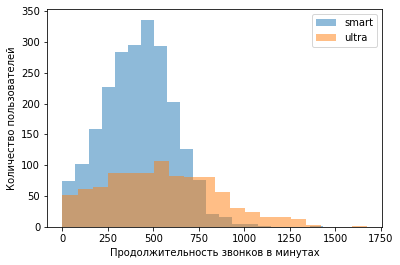

In [50]:
plt.hist(smart['calls_sum'], bins=20, alpha=0.5, label='smart')
plt.hist(ultra['calls_sum'], bins=20, alpha=0.5, label='ultra')
plt.legend(loc='upper right')
plt.xlabel("Продолжительность звонков в минутах")
plt.ylabel("Количество пользователей")
print('Средняя продолжительность звонков по каждому тарифу:')
plt.show()

Пользователи тарифа smart расходуют в среднем меньше минут разговора, чем пользователи тарифа ultra, однако в количественном отношении их больше.

### Сколько сообщений требуется пользователям каждого тарифа в месяц?

In [51]:
print('Пользователям тарифа "Смарт" требуется в среднем', smart['messages_count'].mean(), 'сообщений в месяц')

Пользователям тарифа "Смарт" требуется в среднем 38.71644120707596 сообщений в месяц


In [52]:
smart_messages_var = np.var(smart['messages_count'])
print('Дисперсия по тарифу "Смарт" равна:', smart_messages_var)
smart_messages_sd = np.sqrt(smart_messages_var)
print('Стандартное отклонение по тарифу "Смарт" равно:', smart_messages_sd)

Дисперсия по тарифу "Смарт" равна: 717.220843110227
Стандартное отклонение по тарифу "Смарт" равно: 26.780979129042816


In [53]:
print('Пользователям тарифа "Ультра" требуется в среднем', ultra['messages_count'].mean(), 'сообщений в месяц')

Пользователям тарифа "Ультра" требуется в среднем 61.161006289308176 сообщений в месяц


In [54]:
ultra_messages_var = np.var(ultra['messages_count'])
print('Дисперсия по тарифу "Ультра" равна:', ultra_messages_var)
ultra_messages_sd = np.sqrt(ultra_messages_var)
print('Стандартное отклонение по тарифу "Ультра" равно:', ultra_messages_sd)

Дисперсия по тарифу "Ультра" равна: 2107.0055235156838
Стандартное отклонение по тарифу "Ультра" равно: 45.90212983637779


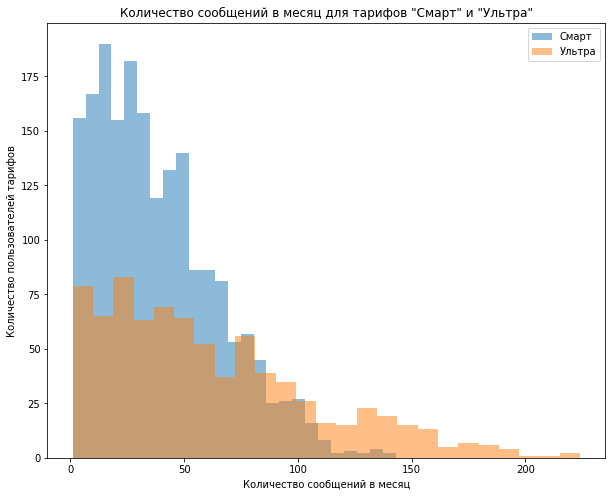

In [55]:
full.groupby('tariff')['messages_count'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Количество сообщений в месяц для тарифов "Смарт" и "Ультра"')
plt.xlabel('Количество сообщений в месяц')
plt.ylabel('Количество пользователей тарифов')

plt.show()

Большинство пользователей тарифа smart отправляют не более 60-ти сообщений в месяц, примерно такое же количество сообщений в месяц отправляют пользователи тарифа ultra, однако некоторые из последних отправляют и более 150 сообщений в месяц. 

### Какой объем интернет-трафика требуется пользователям кажждого тарифа в месяц?

In [56]:
print('Средний объем трафика для тарифа "Смарт" составляет', smart['gb_used'].mean(), 'гб. в месяц')

Средний объем трафика для тарифа "Смарт" составляет 15.835607274601662 гб. в месяц


In [57]:
smart_gb_var = np.var(smart['gb_used'])
print('Дисперсия по тарифу "Смарт" равна:', smart_gb_var)
smart_gb_sd = np.sqrt(smart_gb_var)
print('Стандартное отклонение по тарифу "Смарт" равно:', smart_gb_sd)

Дисперсия по тарифу "Смарт" равна: 32.75349598018425
Стандартное отклонение по тарифу "Смарт" равно: 5.723067008185755


In [58]:
print('Средний объем трафика для тарифа "Ультра" составляет', ultra['gb_used'].mean(), 'гб. в месяц')

Средний объем трафика для тарифа "Ультра" составляет 19.207505138221155 гб. в месяц


In [59]:
ultra_gb_var = np.var(ultra['gb_used'])
print('Дисперсия по тарифу "Ультра" равна:', ultra_gb_var)
ultra_gb_sd = np.sqrt(ultra_gb_var)
print('Стандартное отклонение по тарифу "Ультра" равно:', ultra_gb_sd)

Дисперсия по тарифу "Ультра" равна: 94.18759319585469
Стандартное отклонение по тарифу "Ультра" равно: 9.70502927331261


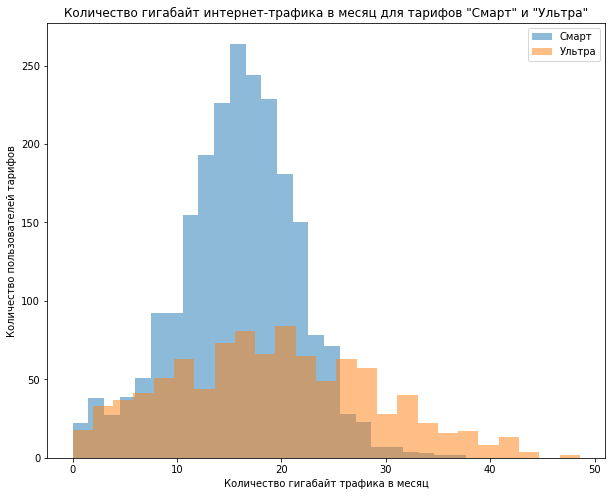

In [60]:
full.groupby('tariff')['gb_used'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Смарт', 'Ультра'])
plt.title('Количество гигабайт интернет-трафика в месяц для тарифов "Смарт" и "Ультра"')
plt.xlabel('Количество гигабайт трафика в месяц')
plt.ylabel('Количество пользователей тарифов')

plt.show()

У пользователей тарифа smart меньший размах значений по сравнению с пользователями тарифа ultra: большинство укладывается в 15-25 гб. Среди пользователей тарифа ultra показатели более разнообразны: Есть те, кто использует меньше 10-ти гб., а есть и те, кто использует больше 30-ти гб. в месяц, причем значительного большинства не наблюдается.

## Проверка гипотез

### Гипотеза 1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются

Возьмем за главную гипотезу то предположение, что средние показатели выручки равны, чтобы принять ее или отвергнуть.
Сформулируем нулевую и альтернативную гипотезы:

* Н0 - средняя выручка пользоватлей тарифа "Ультра" = средней выручке пользователей тарифа "Смарт"

ultra['earning'].mean() = smart['earning'].mean()

* Н1 - средняя выручка пользоватлей тарифа "Ультра" != средней выручке пользователей тарифа "Смарт"

ultra['earning'].mean() != smart['earning'].mean()

Подсчитаем дисперсии для наших выборок выручек по тарифам:

In [61]:
ultra_earning_var = np.var(ultra['earning'])
print('Дисперсия по тарифу "Ультра" равна:', ultra_earning_var)

Дисперсия по тарифу "Ультра" равна: 141373.07325620347


In [62]:
smart_earning_var = np.var(smart['earning'])
print('Дисперсия по тарифу "Смарт" равна:', smart_earning_var)

Дисперсия по тарифу "Смарт" равна: 669485.2209234245


In [63]:
print('Количество пользователей тарифа "Смарт":', smart['user_id'].count())
print('Количество пользователей тарифа "Ультра":',ultra['user_id'].count())

Количество пользователей тарифа "Смарт": 2229
Количество пользователей тарифа "Ультра": 985


Дисперсии неравны, что уже говорит в пользу того, что нулевую гипотезу нужно отвергнуть, однако мы все же перепроверим полученные данные. Также наши выборки не равны между собой, что указание в equal_var значения False.

In [64]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(
    ultra['earning'], 
    smart['earning'],
    equal_var = False)
    
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [65]:
st.ttest_ind(
    [550, 550], 
    [1950, 1950])

Ttest_indResult(statistic=-inf, pvalue=0.0)

Результаты показали, что средние выручки по двум исследуемым тарифам различаются, а значит главная гипотеза, заявленная в заголовке, верна.

### Гипитоеза 2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Изначально города не были добавлены в итоговый датафрейм (моя вина), поэтому добавим их сейчас. Создадим датафреймы с выборками пользователей из Москвы и других городов нашей страны. 

In [66]:
city = users[['user_id', 'city']]
full = full.merge(city, on='user_id')
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   calls_sum              3174 non-null   float64
 2   gb_used                3203 non-null   float64
 3   calls_count            3174 non-null   float64
 4   messages_count         2717 non-null   float64
 5   tariff                 3214 non-null   object 
 6   messages_included      3214 non-null   int64  
 7   mb_per_month_included  3214 non-null   int64  
 8   minutes_included       3214 non-null   int64  
 9   rub_monthly_fee        3214 non-null   int64  
 10  rub_per_gb             3214 non-null   int64  
 11  rub_per_message        3214 non-null   int64  
 12  rub_per_minute         3214 non-null   int64  
 13  gb_per_month_included  3214 non-null   float64
 14  earning                3214 non-null   float64
 15  city

Проверили, новый столбец на своем месте.

In [67]:
moscow_earning = full.query('city == "Москва"')
other_earning = full.query('city != "Москва"')

In [68]:
moscow_earning.head(10)

,user_id,calls_sum,gb_used,calls_count,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,earning,city
8,1003,380.0,8.364463,55.0,37.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
9,1003,961.0,12.176631,134.0,91.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
10,1003,855.0,14.422012,108.0,83.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
11,1003,824.0,11.090713,115.0,94.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
12,1003,802.0,9.884307,108.0,75.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
67,1049,403.0,6.050332,55.0,NaN,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
68,1049,528.0,5.167090,76.0,NaN,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
69,1049,525.0,9.078477,85.0,NaN,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
70,1049,520.0,7.420156,76.0,NaN,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва
71,1049,653.0,8.219746,89.0,NaN,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Москва


In [69]:
other_earning.head(10)

,user_id,calls_sum,gb_used,calls_count,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,earning,city
0,1000,159.0,2.200674,22.0,22.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
1,1000,172.0,22.689229,43.0,60.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
2,1000,340.0,13.675430,47.0,75.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
3,1000,408.0,13.726494,52.0,81.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
4,1000,466.0,14.227451,58.0,57.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
5,1000,350.0,14.357900,57.0,73.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
6,1000,338.0,14.410615,43.0,58.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
7,1000,333.0,9.587510,46.0,70.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Краснодар
13,1004,35.0,13.089824,9.0,95.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Новокузнецк
14,1004,171.0,17.187520,31.0,134.0,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0,Новокузнецк


Сформулируем гипотезы:

* Н0 - средняя выручка пользователей из Москвы = средней выручке пользователей из других регионов(городов)
* Н1 - средняя выручка пользователей из Москвы != средней выручке пользователей из других регионов(городов)

Подсчитаем дисперсии:

In [70]:
moscow_earning_var = np.var(moscow_earning['earning'])
print('Дисперсия по выручке пользователей из Москвы:', moscow_earning_var)
other_earning_var = np.var(other_earning['earning'])
print('Дисперсия по выручке пользователей из других городов:', other_earning_var)

Дисперсия по выручке пользователей из Москвы: 564710.7117467273
Дисперсия по выручке пользователей из других городов: 653886.3270894174


In [71]:
print('Количество пользователей из Москвы:', moscow_earning['user_id'].count())
print('Количество пользователей из других регионов:', other_earning['user_id'].count())

Количество пользователей из Москвы: 611
Количество пользователей из других регионов: 2603


Дисперсии не равны, как неравнозначны по объему и выборки, так что поступаем так же, как и при проверке первой гипотезы.

In [72]:
alpha = 0.05
results1 = st.ttest_ind(
    moscow_earning['earning'], 
    other_earning['earning'],
    equal_var = False)
    
print('p-значение:', results1.pvalue)
if results1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Результаты показывают, что нельзя все таки отвергнуть нулевую гипотезу, и таким образом, мы делаем вывод, что средняя выручка пользователей из Москвы схожа со средней выручкой пользователей из других регионов .

## Общий вывод

* Помесячная выручка с пользователя по месяцам составила для тарифа "Смарт" 1265 рублей с человека, а для пользователей тарифа "Ультра" 2038 рублей соответственно;
* Пользователи тарифа "Смарт" расходуют в среднем меньше минут разговора, чем пользователи тарифа "Ультра", однако в количественном отношении их больше;
* Большинство пользователей тарифа "Смарт" отправляют не более 60-ти сообщений в месяц, примерно такое же количество сообщений в месяц отправляют пользователи тарифа "Ультра", однако некоторые из последних отправляют и более 150 сообщений в месяц; 
* У пользователей тарифа "Смарт" меньший размах значений по сравнению с пользователями тарифа "Ультра": большинство укладывается в 15-25 гб. Среди пользователей тарифа "Ультра" показатели более разнообразны: Есть те, кто использует меньше 10-ти гб., а есть и те, кто использует больше 30-ти гб. в месяц, причем значительного большинства не наблюдается;
* Результаты показали, что средние выручки по двум исследуемым тарифам различаются;
* Гипотеза о том, что средняя выручка пользователей из Москвы и других регионов различается не верна.

Таким образом, мы делаем вывод о том, что более **выгодным** является тариф **"Ультра"**.